In [38]:
import os
import zipfile
import random
import tensorflow as tf
import shutil
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
from os import getcwd
import wget

In [39]:
training=wget.download('https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip',bar=None)


In [40]:
zip_ref=zipfile.ZipFile(training,'r')
zip_ref.extractall('D:/win_Downloads/cats_v_dogs')

In [42]:
os.mkdir('D:/win_Downloads/cats_v_dogs/tranining')
os.mkdir('D:/win_Downloads/cats_v_dogs/tranining/cats')
os.mkdir('D:/win_Downloads/cats_v_dogs/tranining/dogs')
os.mkdir('D:/win_Downloads/cats_v_dogs/validation')
os.mkdir('D:/win_Downloads/cats_v_dogs/validation/cats')
os.mkdir('D:/win_Downloads/cats_v_dogs/validation/dogs')

In [43]:
def split_data(source,training,testing,split_size):
    all_files=[]
    for file_name in os.listdir(source):
        filepath=source+'/'+file_name
        
        if os.path.getsize(filepath):
            all_files.append(file_name)
        else:
            print('{} is zero length, ignoring!!'.format(filepath))
    
    n_files=len(all_files)
    split_point=int(n_files*split_size)
    
    shuffled=random.sample(all_files,n_files)
    
    train_set=all_files[:split_point]
    test_set=all_files[split_point:]
    
    for file in train_set:
        copyfile(source+'/'+file, training+'/'+file)
        
    for file in test_set:
        copyfile(source+'/'+file, testing+'/'+file)

In [44]:
cat_src_dir='D:/win_Downloads/cats_v_dogs/PetImages/Cat'
dog_src_dir='D:/win_Downloads/cats_v_dogs/PetImages/Dog'
train_cats_dir='D:/win_Downloads/cats_v_dogs/tranining/cats'
train_dogs_dir='D:/win_Downloads/cats_v_dogs/tranining/dogs'
valid_cats_dir='D:/win_Downloads/cats_v_dogs/validation/cats'
valid_dogs_dir='D:/win_Downloads/cats_v_dogs/validation/dogs'

In [45]:
split_data(cat_src_dir,train_cats_dir,valid_cats_dir,0.9)
split_data(dog_src_dir,train_dogs_dir,valid_dogs_dir,0.9)

D:/win_Downloads/cats_v_dogs/PetImages/Cat/666.jpg is zero length, ignoring!!
D:/win_Downloads/cats_v_dogs/PetImages/Dog/11702.jpg is zero length, ignoring!!


In [46]:
print(len(os.listdir(train_cats_dir)))
print(len(os.listdir(train_dogs_dir)))
print(len(os.listdir(valid_cats_dir)))
print(len(os.listdir(valid_dogs_dir)))

11250
11250
1250
1250


In [47]:
train_datagen=ImageDataGenerator(rescale=1./255)
valid_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory('D:/win_Downloads/cats_v_dogs/tranining',
                                                 target_size=(150,150),
                                                 batch_size=64,
                                                 class_mode='binary')

valid_generator=valid_datagen.flow_from_directory('D:/win_Downloads/cats_v_dogs/validation',
                                                 target_size=(150,150),
                                                 batch_size=64,
                                                 class_mode='binary')

Found 22500 images belonging to 2 classes.
Found 2498 images belonging to 2 classes.


In [48]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (2,2), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

Instructions for updating:
Colocations handled automatically by placer.


In [50]:
model.compile(optimizer=RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['acc'])

In [54]:
history=model.fit_generator(train_generator,
                           epochs=2,
                           verbose=1,
                           validation_data=valid_generator)

Epoch 1/2
31/40 [======================>.......] - ETA: 15s - loss: 0.4972 - acc: 0.7566

c:\users\kiran\appdata\local\programs\python\python35\lib\site-packages\PIL\TiffImagePlugin.py:766: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
c:\users\kiran\appdata\local\programs\python\python35\lib\site-packages\PIL\TiffImagePlugin.py:766: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
c:\users\kiran\appdata\local\programs\python\python35\lib\site-packages\PIL\TiffImagePlugin.py:766: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
c:\users\kiran\appdata\local\programs\python\python35\lib\site-packages\PIL\TiffImagePlugin.py:766: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
c:\users\ki

352/352 [==============================] - 708s 2s/step - loss: 0.5351 - acc: 0.7281 - val_loss: 0.4999 - val_acc: 0.7522
Epoch 2/2
352/352 [==============================] - 667s 2s/step - loss: 0.4513 - acc: 0.7848 - val_loss: 0.6417 - val_acc: 0.7302


Text(0.5, 1.0, 'Training and validation loss')

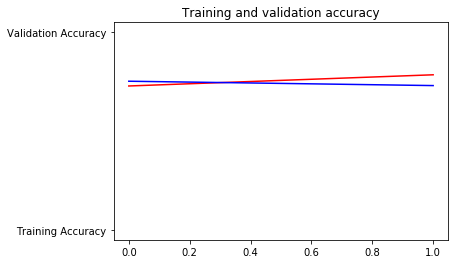

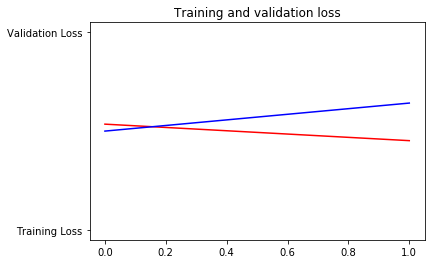

In [55]:
# PLOT LOSS AND ACCURACY
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

# Desired output. Charts with training and validation metrics. No crash :)

In [ ]:
# Here's a codeblock just for fun. You should be able to upload an image here 
# and have it classified without crashing

import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
    # predicting images
    path = '/content/' + fn
    img = image.load_img(path, target_size=(# YOUR CODE HERE))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    print(classes[0])
    if classes[0]>0.5:
        print(fn + " is a dog")
    else:
        print(fn + " is a cat")